In [0]:
%load_ext autoreload
%autoreload 2

In [2]:
! wget https://raw.githubusercontent.com/deeplearning-itba/12-RNN/master/RNN_utils.py

--2019-11-07 21:42:07--  https://raw.githubusercontent.com/deeplearning-itba/12-RNN/master/RNN_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974 (3.9K) [text/plain]
Saving to: ‘RNN_utils.py.1’

RNN_utils.py.1      100%[===================>]   3.88K  --.-KB/s    in 0s      

2019-11-07 21:42:08 (108 MB/s) - ‘RNN_utils.py.1’ saved [3974/3974]



In [3]:
! wget https://raw.githubusercontent.com/deeplearning-itba/12-RNN/master/federico-garcia-lorca/bodas_de_sangre.txt

--2019-11-07 21:42:13--  https://raw.githubusercontent.com/deeplearning-itba/12-RNN/master/federico-garcia-lorca/bodas_de_sangre.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69219 (68K) [text/plain]
Saving to: ‘bodas_de_sangre.txt.1’

bodas_de_sangre.txt 100%[===================>]  67.60K  --.-KB/s    in 0.01s   

2019-11-07 21:42:13 (6.68 MB/s) - ‘bodas_de_sangre.txt.1’ saved [69219/69219]



In [4]:
from RNN_utils import window_transform_text, encode_io_pairs, get_deep_rnn

Using TensorFlow backend.


# Abro archivo de texto con obra e imporimo los primeros 1000 caracteres

In [5]:
text = open('bodas_de_sangre.txt').read()
number_of_chars = len(text)
all_chars = sorted(set(text))
print('Cantidad de caracteres: ' + str(number_of_chars))
print('Cantidad de caracteres unicos: ' + str(len(all_chars)))
print(all_chars)
print('------------------------------------------------------')
print(text[:1000])

Cantidad de caracteres: 67561
Cantidad de caracteres unicos: 71
['\n', ' ', '!', '(', ')', ',', '.', '1', '2', '3', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'x', 'y', 'z', '¡', '¿', 'É', 'Ñ', 'á', 'é', 'í', 'ñ', 'ó', 'ú']
------------------------------------------------------
BODAS DE SANGRE(1933)

Poema trágico en tres actos y siete cuadros

Personajes
 
Madre
Criada
Leonardo
Mozos
Novia
Vecina
Novio
Leñadores
Suegra
Muchachas
Padre de la novia
Mozos
Mujer de Leonardo
Luna
Muerte (como mendiga)

Acto primero

CUADRO PRIMERO

Habitación pintada de amarillo.

NOVIO: (Entrando) Madre.

MADRE: ¿Que?

NOVIO:Me voy.

MADRE: ¿Adónde?

NOVIO:A la viña. (Va a salir)

MADRE: Espera.

NOVIO:¿Quieres algo?

MADRE: Hijo, el almuerzo.

NOVIO: Déjalo. Comeré uvas. Dame la navaja.

MADRE: ¿Para qué?

NOVI

In [6]:
chars = set(text)
len(chars)

71

# Analisis de la frecuencia de los caracteres

In [7]:
from collections import Counter
Counter(text).most_common()

[(' ', 10351),
 ('a', 5847),
 ('e', 5543),
 ('o', 4129),
 ('s', 3118),
 ('r', 2911),
 ('n', 2891),
 ('l', 2523),
 ('\n', 2423),
 ('i', 1991),
 ('u', 1984),
 ('d', 1874),
 ('t', 1623),
 ('c', 1391),
 ('.', 1369),
 ('m', 1266),
 ('A', 1033),
 (':', 888),
 ('p', 832),
 ('E', 692),
 ('O', 624),
 ('b', 599),
 ('v', 585),
 ('q', 583),
 ('D', 545),
 ('N', 539),
 ('y', 536),
 ('h', 524),
 ('R', 515),
 ('g', 498),
 (',', 465),
 ('I', 399),
 ('M', 398),
 ('V', 366),
 ('C', 351),
 ('(', 329),
 (')', 329),
 ('j', 328),
 ('L', 308),
 ('!', 282),
 ('¡', 280),
 ('í', 275),
 ('á', 252),
 ('é', 249),
 ('?', 237),
 ('¿', 235),
 ('S', 226),
 ('P', 226),
 ('U', 193),
 ('z', 186),
 ('f', 172),
 ('H', 158),
 ('ñ', 136),
 ('Q', 125),
 ('Y', 123),
 ('ó', 111),
 ('T', 109),
 ('G', 68),
 ('J', 66),
 ('1', 63),
 ('Ñ', 58),
 ('ú', 57),
 (';', 39),
 ('2', 36),
 ('B', 21),
 ('Z', 21),
 ('3', 20),
 ('F', 20),
 ('x', 11),
 ('É', 5),
 ('9', 1)]

# Veo ejemplos en train de como queda Entrada / Salida

In [0]:
import numpy as np

In [0]:
def create_dataset(text, window = 100):
  inputs = []
  outputs = []
  
  for i in range(len(text)-window):
    inputs.append(text[i:i+window])
    outputs.append(text[i+1:i+window+1])
  return inputs, outputs

In [0]:
def encode_text(inputs,chars, window_size):
    num_chars = len(chars)
    chars_to_indices = dict((c, i) for i, c in enumerate(chars))
    # cut up text into character input/output pairs
    
    # create empty vessels for one-hot encoded input/output
    X = np.zeros((len(inputs), window_size, num_chars), dtype=np.bool)
    
    # loop over inputs/outputs and tranform and store in X/y
    for i, sentence in enumerate(inputs):
        for t, char in enumerate(sentence):
            if char not in chars_to_indices:
                char = ' '
            X[i, t, chars_to_indices[char]] = 1
    return X

In [0]:
window_size = 100
X_, y_ = create_dataset(text, window_size)
X = encode_text(X_, chars, window_size)
y = encode_text(y_, chars, window_size)

In [14]:
print('ENTRADA:')
print(X_[-1])
print('----------------')
print('SALIDA:')
print(y_[-1])
print('----------------')

ENTRADA:
o
donde tiembla enmarañada
la oscura raíz del grito.
(Las vecinas, arrodilladas en el suelo, lloran.
----------------
SALIDA:

donde tiembla enmarañada
la oscura raíz del grito.
(Las vecinas, arrodilladas en el suelo, lloran.)
----------------


In [15]:
X.shape, y.shape

((67461, 100, 71), (67461, 100, 71))

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, shuffle=False)

## Por que shuffle va en TRUE?? ##

In [17]:
chars_to_indices = dict((c, i) for i, c in enumerate(chars))
indices_to_chars = dict((i, c) for i, c in enumerate(chars))
print(chars_to_indices)

{'9': 0, 'a': 1, 'M': 2, 'C': 3, 'j': 4, 'O': 5, 'd': 6, '¡': 7, 'ñ': 8, 'b': 9, 'r': 10, ' ': 11, 'L': 12, 'D': 13, 'm': 14, 'u': 15, 'ú': 16, '\n': 17, 'g': 18, 'c': 19, '(': 20, 'á': 21, ':': 22, 'F': 23, '!': 24, 't': 25, 'Y': 26, 'P': 27, 'J': 28, ')': 29, '1': 30, 'p': 31, 'S': 32, 'z': 33, 'l': 34, 'Z': 35, 'T': 36, ',': 37, 'o': 38, 'U': 39, 'Q': 40, 'G': 41, 'N': 42, '.': 43, 'y': 44, '?': 45, 'n': 46, 'í': 47, 'H': 48, '2': 49, 'V': 50, 'h': 51, 'x': 52, 'Ñ': 53, '3': 54, 'I': 55, 'f': 56, ';': 57, 'v': 58, 'R': 59, 'e': 60, 'É': 61, 'E': 62, 'B': 63, 'i': 64, 'é': 65, 's': 66, '¿': 67, 'A': 68, 'ó': 69, 'q': 70}


In [18]:
X_train[0,0]*1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0])

# Defino modelo

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, Dropout, SimpleRNN 
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
from keras.callbacks import ModelCheckpoint 
import keras
import random

In [0]:
def get_model(dropout_p = 0.1, output = len(chars), input_shape = X_train.shape[1:], LSTM_units=200):
  model = Sequential()
  # Completar, usar dropout 
  model.add(SimpleRNN( ,dropout=dropout_p))
  model.add(Dense(, activation=''))
  model.compile(loss='', optimizer='rmsprop')
  return model

In [109]:
model = get_model()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [110]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 200)          217600    
_________________________________________________________________
dense_5 (Dense)              (None, 100, 71)           14271     
Total params: 231,871
Trainable params: 231,871
Non-trainable params: 0
_________________________________________________________________


# Primer modelo lo mas sencillo

In [111]:
batch_size = 256
checkpointer = ModelCheckpoint(filepath='bodas_sangre_RNN.hdf5', verbose=1, save_best_only=True)
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=15, verbose = 1, 
                    validation_data = (X_validation, y_validation),
                    callbacks=[checkpointer])

Train on 53968 samples, validate on 13493 samples
Epoch 1/10
53968/53968 [==============================] - 39s 729us/step - loss: 2.9513 - val_loss: 2.4707

Epoch 00001: val_loss improved from inf to 2.47072, saving model to bodes_sangre_LSTM_deep_no_dropout.hdf5
Epoch 2/10
53968/53968 [==============================] - 39s 718us/step - loss: 2.1563 - val_loss: 2.1367

Epoch 00002: val_loss improved from 2.47072 to 2.13671, saving model to bodes_sangre_LSTM_deep_no_dropout.hdf5
Epoch 3/10
53968/53968 [==============================] - 39s 715us/step - loss: 1.8931 - val_loss: 2.0109

Epoch 00003: val_loss improved from 2.13671 to 2.01087, saving model to bodes_sangre_LSTM_deep_no_dropout.hdf5
Epoch 4/10
53968/53968 [==============================] - 38s 711us/step - loss: 1.7375 - val_loss: 1.9185

Epoch 00004: val_loss improved from 2.01087 to 1.91852, saving model to bodes_sangre_LSTM_deep_no_dropout.hdf5
Epoch 5/10
53968/53968 [==============================] - 39s 714us/step - los

In [0]:
from matplotlib import pyplot as plt

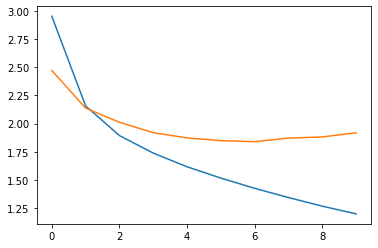

In [113]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [0]:
model.save_weights('bodas_sangre_RNN_last_epoch.hdf5')

In [0]:
model = get_model(input_shape = (None, len(chars)))

In [0]:
model.load_weights('bodas_sangre_RNN.hdf5')
# model.load_weights('bodas_sangre_RNN_last_epoch.hdf5')

In [0]:
from RNN_utils import get_deep_rnn, chars_to_one_hot, sample

# Greedy search

In [209]:
input_text = "Estaba la novi"
X_test = chars_to_one_hot(input_text, chars, chars_to_indices, len(input_text))
predictions = model.predict(X_test)
predictions.shape

(1, 14, 71)

In [0]:
def get_predictions(input_text, pred_char_n = -1, verbose = True):
  # Pasar a one hot enconding
  X_test = chars_to_one_hot(input_text, chars, chars_to_indices, len(input_text))
  # Predicción con modelo
  predictions = 
  # La distribución de probabilidades de caracteres de la salida pred_char_n
  char_prob = 
  # Indices ordenados de mayor probabilidad a menor
  probs_sorted_indexes = np.argsort(char_prob)[::-1] 
  if verbose:
    # Imprime texto original hasta caracter
    print(input_text[:pred_char_n+1])
    # Imprime tuplas de caracter, probabilidad
    print([(indices_to_chars[i], predictions[0][pred_char_n][i]) for i in probs_sorted_indexes[:5]])  
  return indices_to_chars[probs_sorted_indexes[0]]

In [206]:
input_text = "Estaba la novi"
# input_text = "Estaba el novi"
# input_text = "los caballo"
# input_text = "el caballo"
get_predictions(input_text, pred_char_n=3)

Esta
[('d', 0.26864138), ('n', 0.22040726), ('r', 0.21492405), ('s', 0.066548645), (' ', 0.062942505)]


'd'

In [123]:
t = 'NOVIO'
#t = 'NOVIA'
for i in range(100):
  t = t + get_predictions(t,len(t)-1, verbose=False)
  #print(t)
print(t)

NOVIO: ¿Qué tendo?

MADRE: No. Quiero entar en los padres.

NOVIA: (Al nivio) ¿Qué ester de acera?

MADRE


# Sampling model

In [0]:
def sample(a, temperature=1.0, epsilon=1e-10):
    a = np.log(np.array(a) + epsilon)
    a = a*(1/temperature)
    sample_temp = np.exp(a)/(np.exp(a).sum() + epsilon)
    if sample_temp.sum() == 0:
      return np.argmax(a)
    else:
      sample_temp = sample_temp/sample_temp.sum()
    # sample_temp contiene la nueva distribución luego de modificar la temperatura
    choices = range(len(a)) 
    # Elejir un caracter en función de la distribución sample_temp
    sampled_output = 
    return sampled_output

In [0]:
def sample_model(input_text, model=model, chars=chars, chars_to_indices=chars_to_indices, t=1.0):
  X_test = chars_to_one_hot(input_text, chars, chars_to_indices, len(input_text))
  # Predicción con modelo
  p = 
  # Sampleo de distribución p
  sampled_dist = 
  return indices_to_chars[sampled_dist]

In [199]:
input_text = 'Estaba el novi'
for i in range(100):
  print(sample_model(input_text, t=1), end=' ')

o o a o e o o o o o o o o o o e o a o o o o o o o o o a o a o o a o o o o o o o o o o o a a o l o o o o o l o a a a o o o o a o o o o o a o a o o o o o o a o a o o o o o o o a o a o o a o o o e a o o 

In [204]:
t = 'NOVIO'
t = 'NOVIA'
for i in range(100):
  t = t + sample_model(t, t=2)
  # print(t)
print(t)

NOVIA: (ate dete cal, enondollóflomo táy midé?
 y. Díaso con deolsan: und ledarsocnedrsáebumaceo.
¿Pay fi
